# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import os, sys
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="M:/notebooks/Jonathan/Udacity_Project1/p1_navigation/Banana_Windows_x86_64/Banana_Windows_x86_64/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Double DQN

#### The networks  used for the Double Deep Q Agent are two of the same kind (the same for the Vanilla DQN Agent): Forward pass 5 layer  MLP (128,128,128, 64,64)

#### The hyper- parameters for the Agent are listed below:

In [5]:
path=os.getcwd()
path_Double_DQN=path

sys.path.append(path)

import torch
import numpy as np


from agent import Agent
import util
from options import options

options = options()
opts = options.parse()

for arg in vars(opts):
    print( arg, getattr(opts, arg))

agent = Agent(state_size,action_size , opts=opts, seed=0)

****************************
Loading Double Q Learning Agent
****************************
****************************
Loading Double Q Learning PyTorch Model
****************************
****************************
Loading Double Q Learning Memory
****************************
****************************
Loading Double Q Learning Util
****************************
****************************
Loading Double Q Learning Options
****************************
batch 64
memory_size 1000000
update_freq 32
lr 0.0001
discount_rate 0.9
transfer_rate 0.001
env Unity_Banana
env_seed 0
num_episodes 3000
max_iteration 1000
min_epsilon 0.1
decay 0.995
win_cond 13
render True
f C:\Users\jonathanoh\AppData\Roaming\jupyter\runtime\kernel-aede4bad-5082-4e84-88cb-0b14acb78c4f.json


In [6]:
from collections import deque
def Double_DQN(num_episodes = opts.num_episodes, max_iteration = opts.max_iteration, init_epsilon = 1.0, min_epsilon = opts.min_epsilon, decay = opts.decay):
    '''
    :param num_episodes:
    :param max_iteration:
    :param init_epsilon:
    :param min_epsilon:
    :param decay:
    :return:
    '''

    total_reward = []
    total_reward_window = deque(maxlen=100)
    epsilon = init_epsilon

    for i in range(num_episodes):
        rewards = 0
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
 
        for k in range(max_iteration):
            action = (agent.act(state, epsilon)).astype(int)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0] 
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)

            state = next_state
            rewards += reward

            if done:
                break

        total_reward_window.append(rewards)
        total_reward.append(rewards)

        epsilon = max(min_epsilon, epsilon * decay)

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(total_reward_window)), end="")
        if i % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(total_reward_window)))

        if np.mean(total_reward_window) >= opts.win_cond:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i ,
                                                                                         np.mean(total_reward_window)))
            torch.save(agent.local_model.state_dict(), path_Double_DQN+'\\'+'checkpoint.pth')
            break

    torch.save(agent.local_model.state_dict(), path_Double_DQN+'\\'+'checkpoint_end.pth')
    return total_reward

scores_double_dqn = Double_DQN()




Episode 0	Average Score: 0.00
Episode 100	Average Score: 0.92
Episode 200	Average Score: 4.57
Episode 300	Average Score: 8.24
Episode 400	Average Score: 9.47
Episode 500	Average Score: 11.27
Episode 600	Average Score: 11.89
Episode 676	Average Score: 13.00
Environment solved in 676 episodes!	Average Score: 13.00


NameError: name 'plt' is not defined

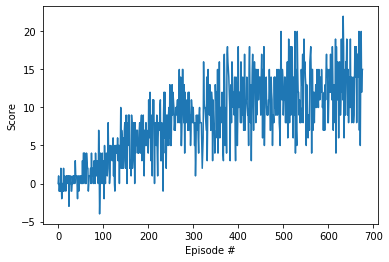

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_double_dqn)), scores_double_dqn)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
if opts.render == True:
    agent.local_model.load_state_dict(torch.load(path_Double_DQN+'\\'+'checkpoint_end.pth'))
    util.render_text_envq(env, agent, brain_name)


Score: 13.0


In [11]:
import pickle
PIK = "scores_double_dqn.dat"

data = scores_double_dqn
with open(PIK, "wb") as f:
    pickle.dump(data, f)
with open(PIK, "rb") as f:
    data= pickle.load(f)


In [ ]:
#env.close()